<a href="https://colab.research.google.com/github/NadimMahmud3219/Cardiovascular-heart-disease-risk-factor-identification-and-risk-factor-identification./blob/main/Copy_of_Copy_of_exploratory_data_analysis_%26_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Cardio_vascular_disease/Dataset/cardio_train.csv',sep=';')

In [ ]:
df #lets take a quick look into data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


The age is in day formet I want this data in year formet so, lets work on this problem

In [ ]:
df["age"] = df["age"].map(lambda x: x // 365)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,52.840671,6.766774,29.0,48.00,53.0,58.00,64.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In the gender column, the valus are currently set as 1 and 2 I want to set this data as 0 and 1 for better understanding  

In [ ]:
df.groupby("gender").mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
1,49898.345267,52.954338,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
2,50110.246547,52.629179,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


In [ ]:
df['gender'] = df['gender'].replace({2: "male", 1: "female"})

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,male,168,62.0,110,80,1,1,0,0,1,0
1,1,55,female,156,85.0,140,90,3,1,0,0,1,1
2,2,51,female,165,64.0,130,70,3,1,0,0,0,1
3,3,48,male,169,82.0,150,100,1,1,0,0,1,1
4,4,47,female,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df['gender'] = df['gender'].replace({"male": "0", "female": "1"})
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,0,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,0,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# To check Is there any duplicate value in the dataset
df.duplicated().sum()

0

In [ ]:
# Lets remove the duplicate values from the dataset
df.drop_duplicates(inplace=True)

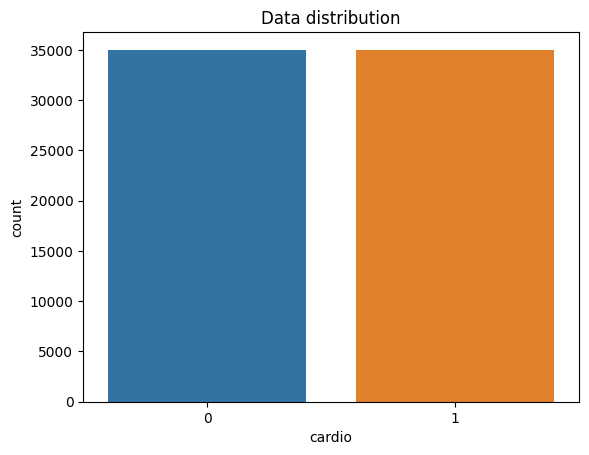

In [ ]:
plt.title("Data distribution")
sns.countplot(data=df , x = 'cardio')
plt.show()

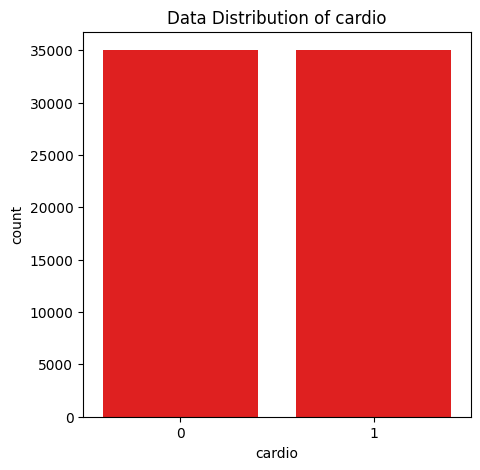

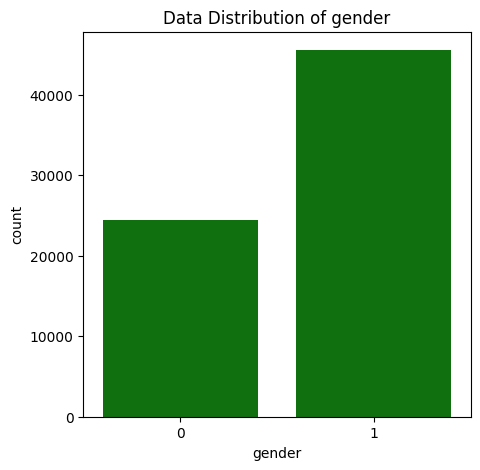

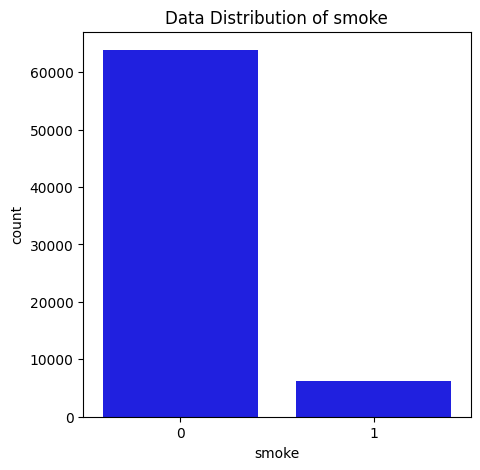

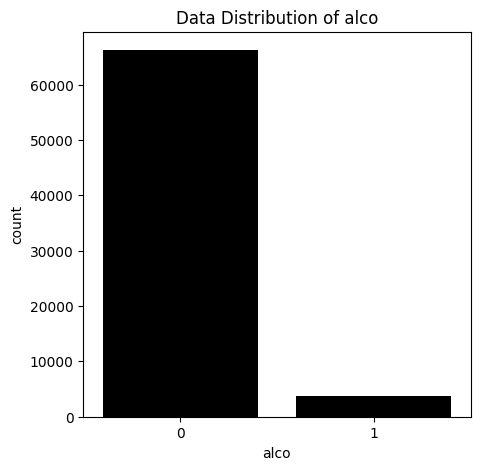

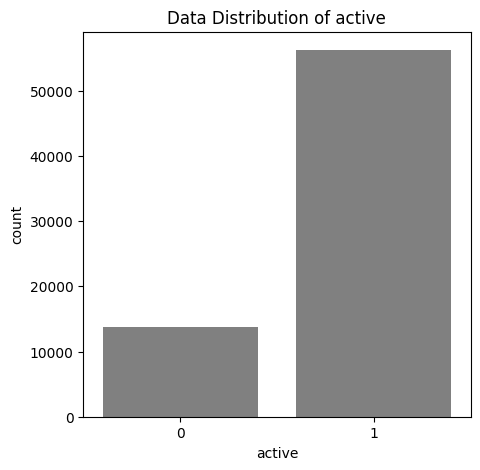

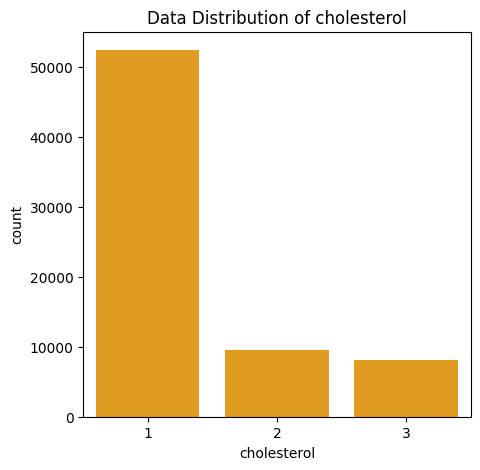

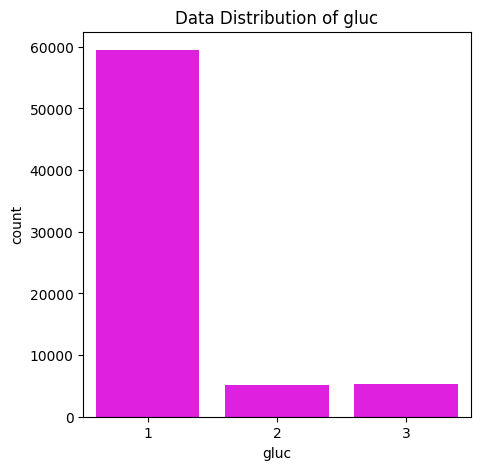

In [ ]:
color_list=["red", "green", "blue","black","grey","orange","magenta"]
col_list=["cardio", "gender", "smoke","alco","active", "cholesterol","gluc"]
for i in range(len(col_list)):
    plt.figure(figsize=(5,5))
    sns.countplot(data=df, x=df[col_list[i]], color=color_list[i])
    plt.title(f"Data Distribution of {col_list[i]}")
    plt.show()

<Axes: xlabel='age', ylabel='Count'>

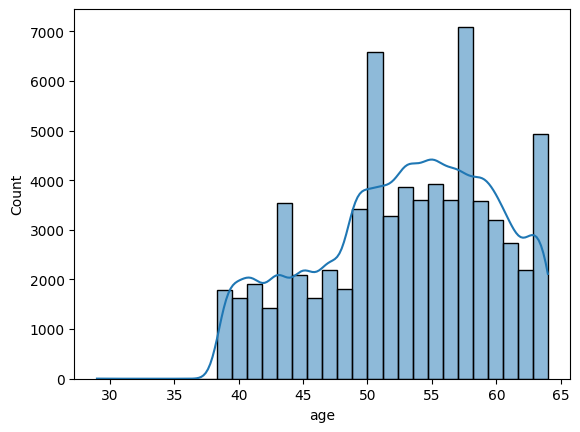

In [ ]:
sns.histplot(data=df, x="age", kde=True,fill = True,bins=30)

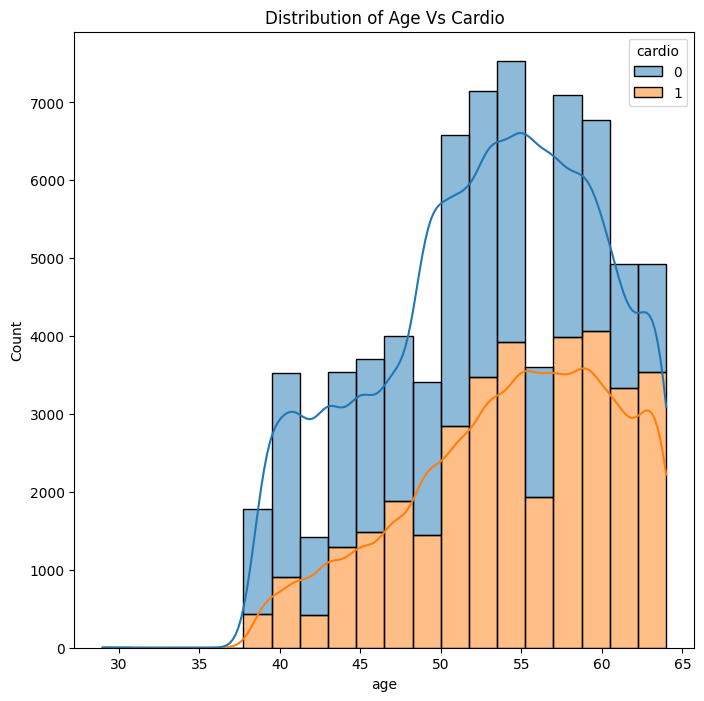

In [ ]:
#Lets check the corrilaation of age with cardio
plt.figure(figsize=(8,8))
sns.histplot(data= df, x=df["age"], hue="cardio", kde = True, multiple='stack',bins=20)
plt.title("Distribution of Age Vs Cardio")
plt.show()

##Here we can see that as the age of the person increases the risk of cardiovascular also increases.


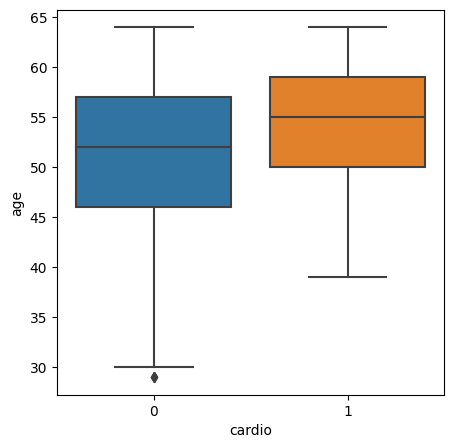

In [ ]:
# Lets check the outliers in the age column
plt.figure(figsize=(5,5))
sns.boxplot(data= df, x=df["cardio"], y=df["age"])
plt.show()

## this plot simply tells us that the most of the percentile that have a high risk of cardio vascular disease is above the age of 50

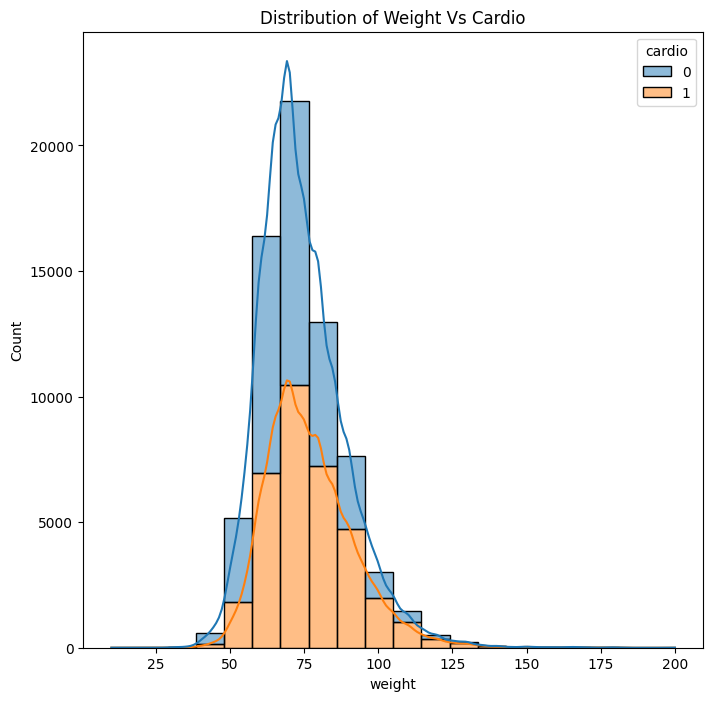

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data= df, x=df["weight"], hue="cardio", multiple='stack',kde=True, bins=20)
plt.title("Distribution of Weight Vs Cardio")
plt.show()

## weight of the person increase the risk


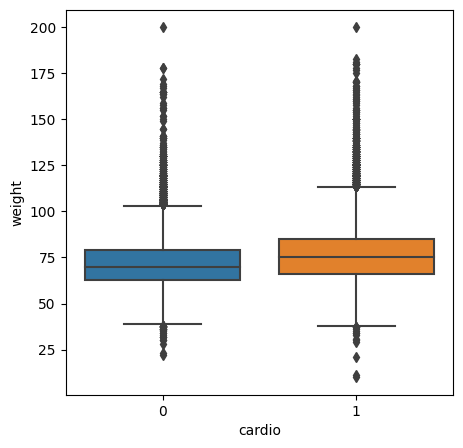

In [ ]:
# Lets check the outliers in the age column
plt.figure(figsize=(5,5))
sns.boxplot(data= df, x=df["cardio"], y=df["weight"])
plt.show()

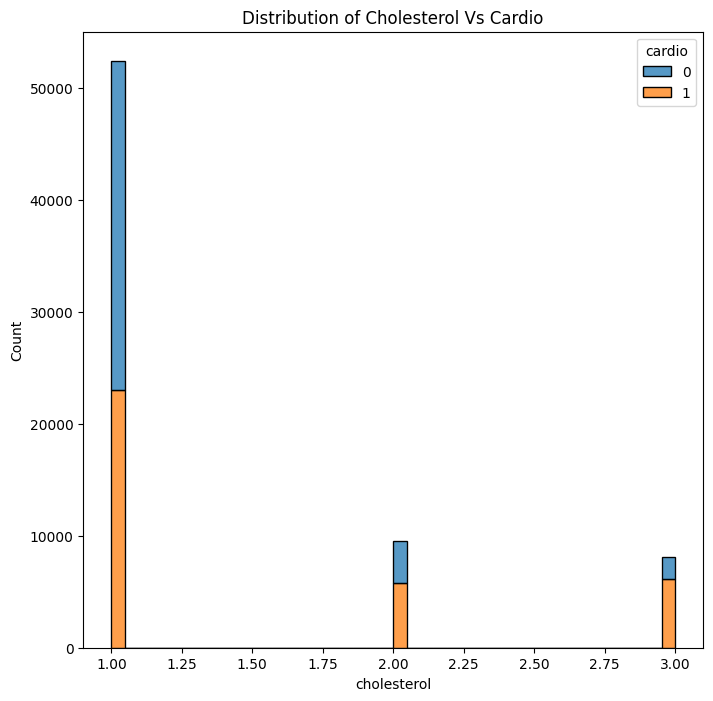

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data= df, x=df["cholesterol"], hue="cardio", multiple='stack')
plt.title("Distribution of Cholesterol Vs Cardio")
plt.show()

##here we can see that higher level of cholesterol increase the chance of cardio vascualar disease

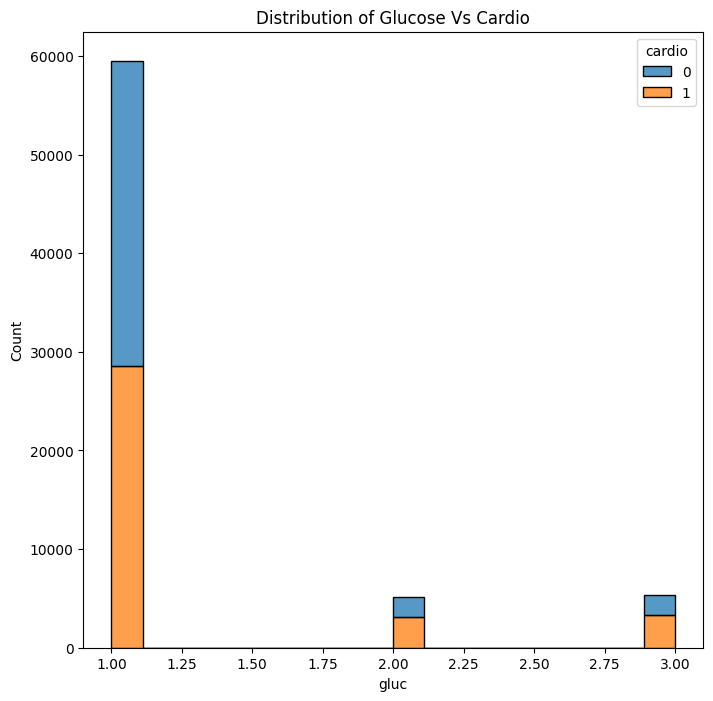

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data= df, x=df["gluc"], hue="cardio", multiple='stack')
plt.title("Distribution of Glucose Vs Cardio")
plt.show()

## here we can see that high level of glucose increase the rate of cardio vascular disease



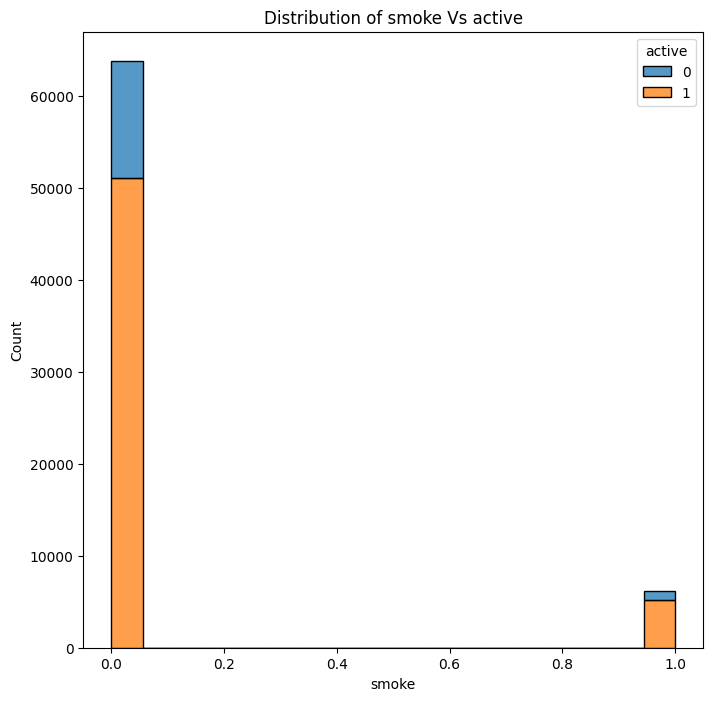

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data= df, x=df["smoke"], hue="active", multiple='stack')
plt.title("Distribution of smoke Vs active")
plt.show()

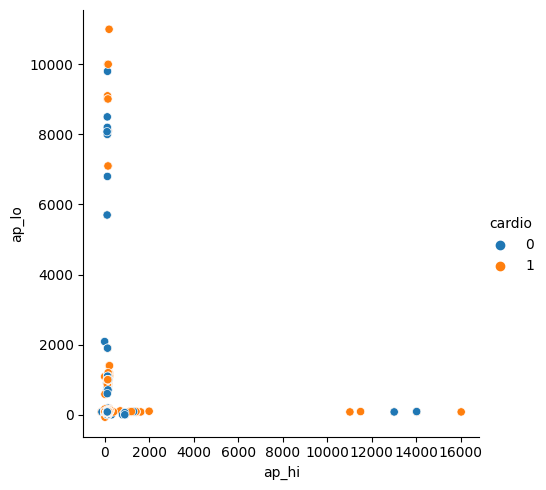

In [ ]:
sns.relplot(data=df,x="ap_hi", y="ap_lo", hue = "cardio")

<Axes: xlabel='height', ylabel='Count'>

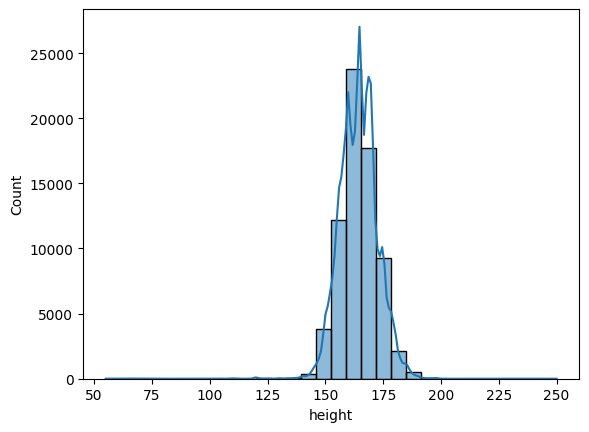

In [ ]:
sns.histplot(data=df, x="height", kde=True,fill = True,bins=30)

<Axes: xlabel='weight', ylabel='Count'>

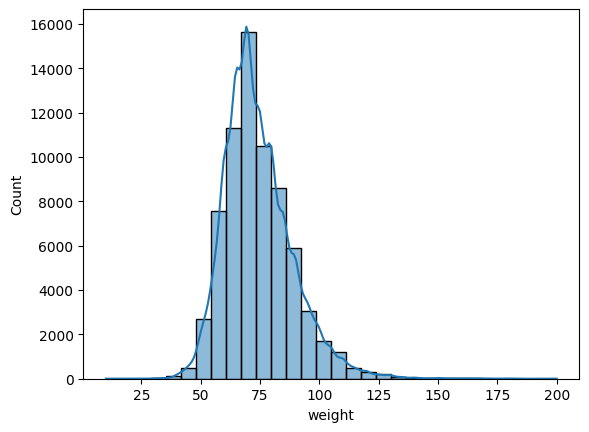

In [ ]:
sns.histplot(data=df, x="weight", kde=True,fill = True,bins=30)

##Outlier Handle Using Zscore


In [ ]:
std = df.age.std()
std

6.766773653742167

In [ ]:
df['Zscore'] = (df.age - df.age.mean())/std

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
0,0,50,0,168,62.0,110,80,1,1,0,0,1,0,-0.419797
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,0.319108
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,-0.272016
3,3,48,0,169,82.0,150,100,1,1,0,0,1,1,-0.715359
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,-0.863140


In [ ]:
df[df['Zscore']<-2.0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
14,23,39,0,181,95.0,130,90,1,1,1,1,1,0,-2.045387
25,36,39,1,153,65.0,130,100,2,1,0,0,1,0,-2.045387
28,39,39,0,166,66.0,120,80,1,1,0,0,1,0,-2.045387
53,68,39,1,165,77.0,135,90,3,3,0,0,1,1,-2.045387
106,141,39,0,162,60.0,120,80,2,1,0,0,1,1,-2.045387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69727,99592,39,1,163,58.0,120,80,1,1,0,0,1,0,-2.045387
69844,99755,39,1,165,62.0,120,80,1,1,0,0,0,0,-2.045387
69847,99760,39,1,168,79.0,120,80,1,1,0,0,0,0,-2.045387
69928,99890,39,1,160,55.0,140,90,1,1,0,0,1,0,-2.045387


In [ ]:
df=df[(df.Zscore > -2.0)]

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
0,0,50,0,168,62.0,110,80,1,1,0,0,1,0,-0.419797
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,0.319108
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,-0.272016
3,3,48,0,169,82.0,150,100,1,1,0,0,1,1,-0.715359
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,-0.863140


In [ ]:
df.shape

(68216, 14)

<Axes: xlabel='age', ylabel='Count'>

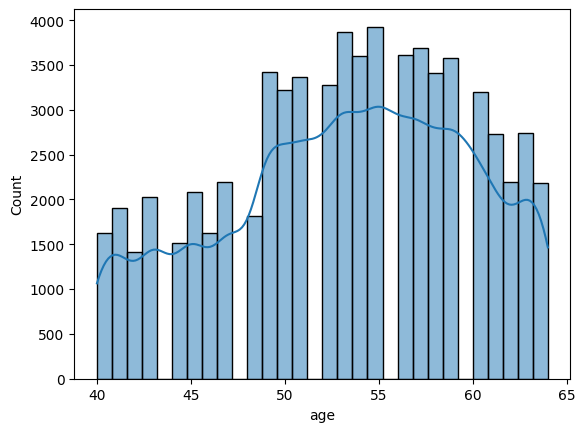

In [ ]:
sns.histplot(data=df, x="age", kde=True,fill = True,bins=30)

blood preassure can never be negative but in this dataset some datpoint contain negative value so convert this negative datapoint into positive by using absolute data that means data will remain same but negative sign just convert into positive sign

In [ ]:
df[df["ap_hi"]<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
4607,6525,41,1,165,78.0,-100,80,2,1,0,0,1,0,-1.749825
16021,22881,60,0,161,90.0,-115,70,1,1,0,0,1,0,1.058012
20536,29313,42,1,153,54.0,-100,70,1,1,0,0,1,0,-1.602044
23988,34295,50,1,162,74.0,-140,90,1,1,0,0,1,1,-0.419797
25240,36025,40,0,168,50.0,-120,80,2,1,0,0,0,1,-1.897606
35040,50055,63,0,168,59.0,-150,80,1,1,0,0,1,1,1.501355
46627,66571,64,0,160,59.0,-120,80,1,1,0,0,0,0,1.649136


In [ ]:
df["ap_hi"]=df["ap_hi"].abs()

In [ ]:
df[df["ap_lo"]<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
60106,85816,61,1,167,74.0,15,-70,1,1,0,0,1,1,1.205793


In [ ]:
df["ap_lo"]=df["ap_lo"].abs()

In [ ]:
df[df['ap_hi']<25]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
567,815,58,1,168,78.0,14,90,2,1,0,0,1,1,0.762450
927,1294,59,0,175,70.0,14,90,3,1,0,0,1,1,0.910231
979,1360,49,1,172,65.0,11,80,1,3,0,0,1,0,-0.567578
1600,2260,52,1,165,66.0,12,80,1,1,0,0,1,0,-0.124235
1627,2301,61,1,165,71.0,14,80,1,1,0,0,1,1,1.205793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68630,98039,58,1,160,59.0,12,80,1,1,0,0,1,0,0.762450
68742,98213,51,1,158,74.0,14,90,1,1,0,0,1,1,-0.272016
68998,98568,52,1,154,77.0,14,90,1,1,0,0,1,0,-0.124235
69137,98743,42,0,176,65.0,12,80,1,1,0,0,1,0,-1.602044


In [ ]:
df['ap_hi'] = df['ap_hi'].apply(lambda x: x*10 if x < 25 else x)

In [ ]:
df[df['ap_hi']<25]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
8757,12494,46,0,163,63.0,10,2088,1,1,1,0,1,0,-1.010921
42334,60477,51,1,171,80.0,10,1088,1,1,0,0,1,1,-0.272016


In [ ]:
df[df['ap_hi']>250]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
1876,2654,41,1,160,60.0,902,60,1,1,0,0,1,0,-1.749825
2014,2845,62,0,167,59.0,906,0,1,1,0,0,1,0,1.353574
7763,11089,57,1,175,80.0,11500,90,1,1,0,0,1,1,0.614669
8915,12710,51,1,164,75.0,1420,80,2,1,0,0,1,1,-0.272016
9557,13616,62,1,155,87.0,701,110,1,1,0,0,1,1,1.353574
13895,19827,43,1,168,72.0,1500,80,1,1,0,0,1,1,-1.454263
17713,25314,61,0,163,50.0,907,70,3,3,0,0,1,1,1.205793
23867,34120,44,1,161,92.0,906,0,2,1,0,0,1,1,-1.306483
25464,36339,43,0,169,75.0,14020,80,2,1,0,0,1,1,-1.454263
25519,36414,58,1,169,71.0,14020,80,3,3,0,0,1,1,0.762450


In [ ]:
df.drop(df[df["ap_hi"]>250].index, inplace = True)

In [ ]:
df.drop(df[df["ap_hi"]<25].index, inplace = True)

In [ ]:
df[df['ap_lo']==0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
13489,19258,41,0,150,60.0,130,0,1,1,0,0,0,0,-1.749825
16459,23512,56,1,156,50.0,138,0,3,1,0,0,1,1,0.466888
17381,24837,49,1,164,78.0,138,0,1,1,0,0,1,0,-0.567578
22923,32749,58,0,166,68.0,149,0,1,1,0,0,1,1,0.762450
25454,36325,49,0,176,73.0,120,0,1,1,0,0,1,0,-0.567578
27686,39577,64,0,180,73.0,140,0,1,1,1,1,1,1,1.649136
38370,54780,63,0,170,81.0,148,0,1,1,0,0,1,0,1.501355
43922,62754,51,1,164,78.0,108,0,2,1,0,0,1,0,-0.272016
45835,65470,53,0,165,70.0,140,0,3,1,1,0,1,0,0.023546
48049,68612,52,1,160,84.0,121,0,1,1,0,0,0,1,-0.124235


In [ ]:
df[df['ap_lo']>df['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
228,314,47,0,183,98.0,160,1100,1,2,1,0,1,1,-0.863140
241,334,60,0,157,60.0,160,1000,2,1,0,0,0,1,1.058012
260,357,49,1,150,83.0,140,800,1,1,0,0,1,1,-0.567578
329,458,64,1,176,63.0,160,1000,2,2,0,0,0,1,1.649136
345,482,51,1,154,81.0,140,1000,2,1,0,0,1,1,-0.272016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,63,1,167,81.0,160,1000,1,1,0,0,1,1,1.501355
69872,99798,59,1,152,56.0,160,1000,1,1,0,0,1,1,0.910231
69878,99807,58,0,168,95.0,160,1000,1,1,0,0,1,1,0.762450
69885,99816,61,0,166,78.0,170,1000,1,1,0,0,0,0,1.205793


In [ ]:
condition = df["ap_hi"]<df["ap_lo"]
df.loc[condition, ["ap_hi", "ap_lo"]] = df.loc[condition, ["ap_lo", "ap_hi"]].values

In [ ]:
df[df['ap_lo']>df['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore


In [ ]:
df['ap_lo'] = df['ap_lo'].apply(lambda x: x*10 if x < 15 else x)

In [ ]:
df[df["ap_lo"]<15]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
13489,19258,41,0,150,60.0,130,0,1,1,0,0,0,0,-1.749825
16459,23512,56,1,156,50.0,138,0,3,1,0,0,1,1,0.466888
17381,24837,49,1,164,78.0,138,0,1,1,0,0,1,0,-0.567578
22923,32749,58,0,166,68.0,149,0,1,1,0,0,1,1,0.762450
25454,36325,49,0,176,73.0,120,0,1,1,0,0,1,0,-0.567578
27686,39577,64,0,180,73.0,140,0,1,1,1,1,1,1,1.649136
35140,50210,57,1,146,55.0,130,10,1,1,0,0,0,0,0.614669
38370,54780,63,0,170,81.0,148,0,1,1,0,0,1,0,1.501355
43922,62754,51,1,164,78.0,108,0,2,1,0,0,1,0,-0.272016
45835,65470,53,0,165,70.0,140,0,3,1,1,0,1,0,0.023546


In [ ]:
df.drop(df[df["ap_lo"]<15].index, inplace = True)

In [ ]:
df[df["ap_lo"]<15]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore


In [ ]:
df[df["ap_hi"]==df["ap_lo"]].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore
12785,18238,43,0,178,105.0,100,100,1,1,0,0,0,1,-1.454263
32190,45975,63,1,162,120.0,100,100,1,1,0,0,1,0,1.501355


In [ ]:
df.drop(df[df["ap_hi"]==df["ap_lo"]].index, inplace = True)

In [ ]:
df[df["ap_hi"]==df["ap_lo"]].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Zscore


In [ ]:
df.shape

(68158, 14)

<Axes: xlabel='ap_hi', ylabel='Count'>

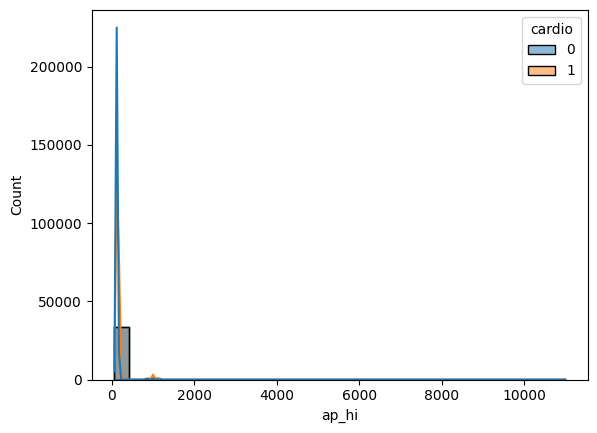

In [ ]:
sns.histplot(data=df, x="ap_hi",fill = True,kde = True,hue="cardio", bins=30)

<Axes: xlabel='ap_lo', ylabel='Count'>

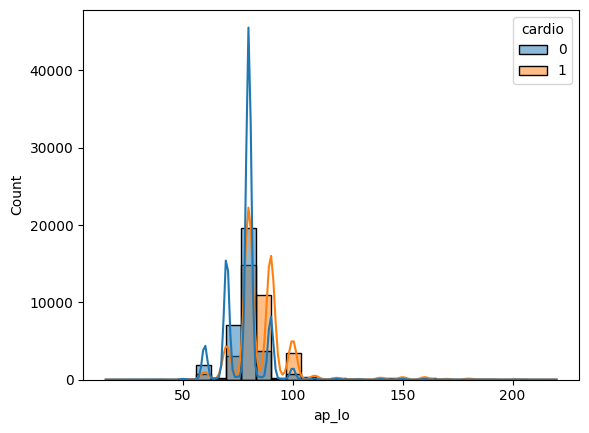

In [ ]:
sns.histplot(data=df, x="ap_lo",fill = True,kde = True,hue="cardio", bins=30)

In [ ]:
##Feature Importance

##Feature Importance

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from xgboost import XGBClassifier,plot_importance

In [ ]:
df.shape

(68158, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68158 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68158 non-null  int64  
 1   age          68158 non-null  int64  
 2   gender       68158 non-null  object 
 3   height       68158 non-null  int64  
 4   weight       68158 non-null  float64
 5   ap_hi        68158 non-null  int64  
 6   ap_lo        68158 non-null  int64  
 7   cholesterol  68158 non-null  int64  
 8   gluc         68158 non-null  int64  
 9   smoke        68158 non-null  int64  
 10  alco         68158 non-null  int64  
 11  active       68158 non-null  int64  
 12  cardio       68158 non-null  int64  
 13  Zscore       68158 non-null  float64
dtypes: float64(2), int64(11), object(1)
memory usage: 7.8+ MB


In [ ]:
df['gender'] = df['gender'].astype(str).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68158 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68158 non-null  int64  
 1   age          68158 non-null  int64  
 2   gender       68158 non-null  float64
 3   height       68158 non-null  int64  
 4   weight       68158 non-null  float64
 5   ap_hi        68158 non-null  int64  
 6   ap_lo        68158 non-null  int64  
 7   cholesterol  68158 non-null  int64  
 8   gluc         68158 non-null  int64  
 9   smoke        68158 non-null  int64  
 10  alco         68158 non-null  int64  
 11  active       68158 non-null  int64  
 12  cardio       68158 non-null  int64  
 13  Zscore       68158 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 7.8 MB


In [ ]:
df.drop(columns=['id'],inplace=True)

In [ ]:
df.drop(columns=['Zscore'],inplace=True)

In [ ]:
df["cardio"].value_counts()

1    34515
0    33643
Name: cardio, dtype: int64

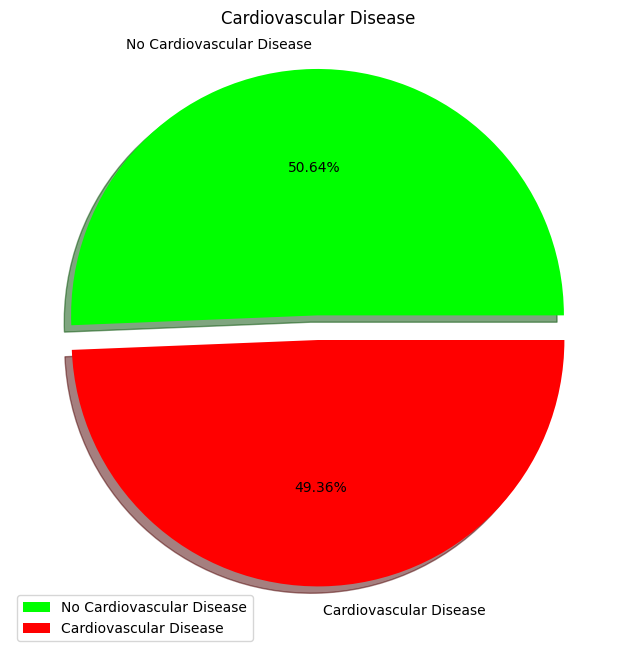

In [ ]:
plt.figure(figsize = (10, 8))
plt.title('Cardiovascular Disease')
plt.pie(df['cardio'].value_counts(), labels = ['No Cardiovascular Disease', 'Cardiovascular Disease'], explode = (0.1, 0.0), colors = ['lime', 'red'],autopct = '%1.2f%%', shadow = True)
plt.legend(loc = 'best')

In [ ]:
x = df.iloc[:,:-1]
y=df.iloc[:,11]

In [ ]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,0.0,168,62.0,110,80,1,1,0,0,1
1,55,1.0,156,85.0,140,90,3,1,0,0,1
2,51,1.0,165,64.0,130,70,3,1,0,0,0
3,48,0.0,169,82.0,150,100,1,1,0,0,1
4,47,1.0,156,56.0,100,60,1,1,0,0,0


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=102)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Mean Squared Error: 0.2651115023474178


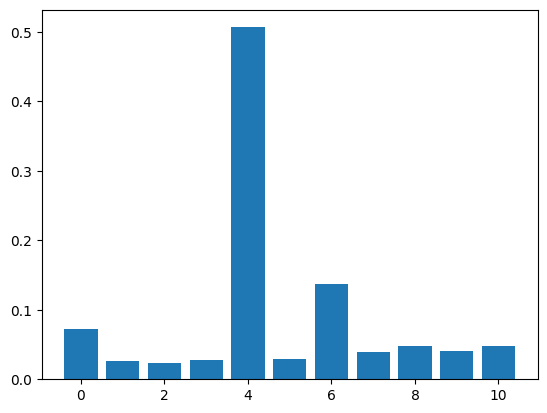

In [ ]:

# Train an XGBoost model
model = XGBClassifier()
model.fit(xtrain, ytrain)

print(model)

# Evaluate the model
y_pred = model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)

print("Mean Squared Error:", mse)

plt.bar(range(len(model.feature_importances_)),model.feature_importances_)
plt.show()


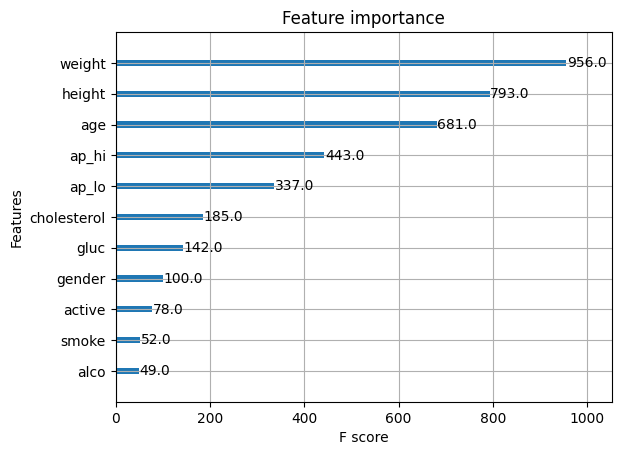

In [ ]:
plot_importance(model)
plt.show()

In [ ]:
importance = pd.DataFrame({"Variable": x.columns,
                           "Importance" : model.feature_importances_})\
                           .sort_values(by='Importance',ascending=False)
print(importance)

       Variable  Importance
4         ap_hi    0.506618
6   cholesterol    0.136523
0           age    0.072473
8         smoke    0.048566
10       active    0.048371
9          alco    0.041048
7          gluc    0.038897
5         ap_lo    0.028905
3        weight    0.028329
1        gender    0.026874
2        height    0.023395


##Using F_ClassIf

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
kbest = SelectKBest(score_func=f_classif,k=6)

In [ ]:
kbest.fit(x,y)

SelectKBest(k=6)

In [ ]:
score=pd.DataFrame(kbest.scores_,columns=['Score'])
score

,Score
0,3668.778953
1,4.739715
2,9.127607
3,2260.084637
4,503.229449
5,6620.588837
6,3405.631743
7,518.070171
8,15.164207
9,2.225131


In [ ]:
name  = pd.DataFrame(x.columns)

In [ ]:
feature = pd.concat([name,score],axis=1)
feature

,0,Score
0,age,3668.778953
1,gender,4.739715
2,height,9.127607
3,weight,2260.084637
4,ap_hi,503.229449
5,ap_lo,6620.588837
6,cholesterol,3405.631743
7,gluc,518.070171
8,smoke,15.164207
9,alco,2.225131


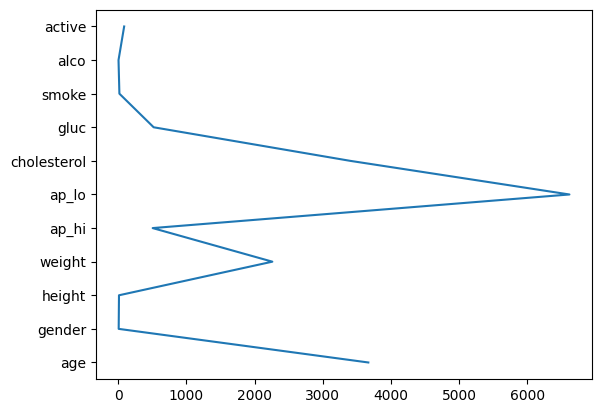

In [ ]:
plt.plot(kbest.scores_,x.columns)


In [ ]:
import statsmodels.api as sm

In [ ]:
xtrain_sm = sm.add_constant(xtrain)

In [ ]:
xtrain_sm

,const,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
108,1.0,42,0.0,174,54.0,130,80,2,2,0,0,1
41328,1.0,43,1.0,171,68.0,120,80,1,1,0,0,1
49605,1.0,51,1.0,160,76.0,100,80,1,1,0,0,1
39884,1.0,64,1.0,178,80.0,140,90,1,1,0,0,0
58266,1.0,61,1.0,160,70.0,110,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53767,1.0,64,1.0,164,75.0,120,70,1,1,0,0,0
19977,1.0,57,1.0,152,69.0,120,80,3,1,0,0,1
17867,1.0,40,1.0,165,58.0,120,80,1,1,0,0,1
69661,1.0,51,1.0,165,80.0,130,80,1,1,0,0,0


In [ ]:
lr = sm.OLS(ytrain,xtrain_sm).fit()

In [ ]:
lr

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 cardio   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     831.1
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:37:05   Log-Likelihood:                -30441.
No. Observations:               47710   AIC:                         6.091e+04
Df Residuals:                   47698   BIC:                         6.101e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0605      0.057    -18.575      

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier().fit(xtrain, ytrain)
GBC.score(xtest, ytest)

0.7369424882629108

In [ ]:
importance = pd.DataFrame({"Variable": x.columns,
                           "Importance" : GBC.feature_importances_})\
                           .sort_values(by='Importance',ascending=False)
print(importance)

       Variable  Importance
4         ap_hi    0.756155
0           age    0.116295
6   cholesterol    0.075397
3        weight    0.017754
5         ap_lo    0.014654
10       active    0.005308
7          gluc    0.004879
2        height    0.003297
8         smoke    0.002551
9          alco    0.002314
1        gender    0.001397


##Lets detect the outliers in the dataset Using Percentile Capping Method


In [ ]:
numerical_cols=["age","weight","height","ap_hi","ap_lo"]

In [ ]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)

        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos)

    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)

    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Ratio of outliers
    x_train.drop(x_train.index[outliers], inplace=True)    # remove the outliers from the training dataset
    y_train.drop(y_train.index[outliers], inplace=True)



    return ratio, x_train, y_train

In [ ]:
ratio, xtrain, ytrain= Winsorization_Method(numerical_cols, xtrain, ytrain , a=1, b=99)

In [ ]:
print(f"Ratio of Outliers detected in Dataset:{ratio}")

Ratio of Outliers detected in Dataset:4.54


In [ ]:
xtrain.shape

(45543, 11)

In [ ]:
ytrain.shape

(45543,)

##scalling numaric columns

In [ ]:
# Let scale the numerical values
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
xtrain[numerical_cols]= scaler.fit_transform(xtrain[numerical_cols])
xtest[numerical_cols]= scaler.fit_transform(xtest[numerical_cols])

In [ ]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
108,-1.333333,0.0,0.818182,-1.058824,0.5,0.0,2,2,0,0,1
41328,-1.222222,1.0,0.545455,-0.235294,0.0,0.0,1,1,0,0,1
49605,-0.333333,1.0,-0.454545,0.235294,-1.0,0.0,1,1,0,0,1
39884,1.111111,1.0,1.181818,0.470588,1.0,1.0,1,1,0,0,0
58266,0.777778,1.0,-0.454545,-0.117647,-0.5,0.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
53767,1.111111,1.0,-0.090909,0.176471,0.0,-1.0,1,1,0,0,0
19977,0.333333,1.0,-1.181818,-0.176471,0.0,0.0,3,1,0,0,1
17867,-1.555556,1.0,0.000000,-0.823529,0.0,0.0,1,1,0,0,1
69661,-0.333333,1.0,0.000000,0.470588,0.5,0.0,1,1,0,0,0


In [ ]:
xtest

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
28679,-1.222222,1.0,0.090909,1.058824,-1.0,-1.0,1,2,0,0,1
59375,-1.444444,1.0,-0.181818,-0.647059,0.0,-1.0,1,1,0,0,0
41065,-0.444444,0.0,-0.454545,-0.705882,0.0,1.0,2,1,1,0,1
8622,0.555556,1.0,-0.727273,1.058824,2.0,2.0,1,3,0,0,1
41469,-1.222222,1.0,0.000000,-1.000000,-1.5,-2.0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
37474,0.555556,1.0,-0.636364,-0.294118,1.5,1.0,1,2,0,0,1
44184,-1.333333,1.0,-1.000000,-1.176471,-0.5,-1.0,1,1,0,0,1
34531,-1.555556,0.0,-0.636364,-0.941176,0.0,0.0,1,1,0,0,1
40156,0.333333,1.0,-0.454545,1.529412,3.0,2.0,1,1,0,0,1


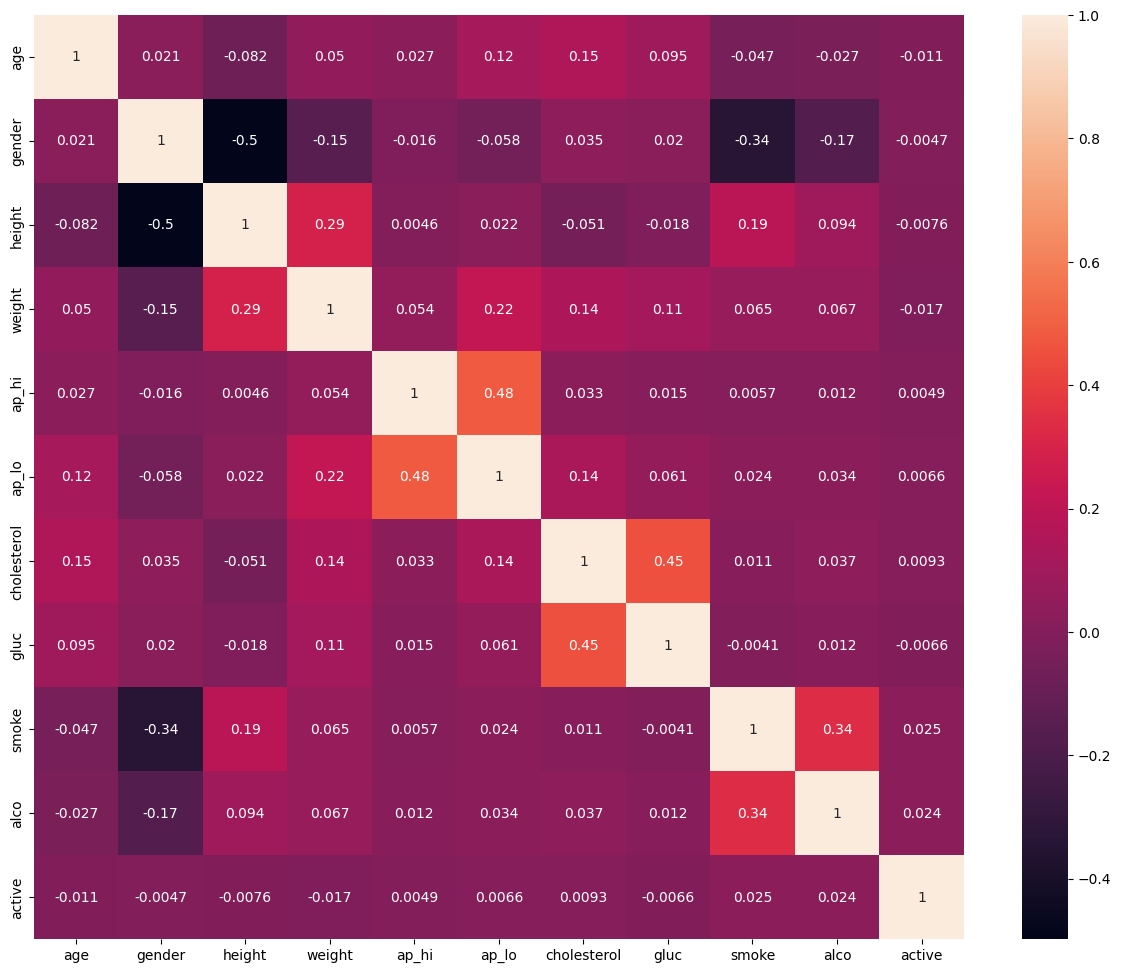

In [ ]:
plt.figure(figsize = (15,12))
dataplot = sns.heatmap(x.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
lg_model = LogisticRegression()

In [ ]:
xtrain.shape

(45543, 11)

In [ ]:
ytrain.shape

(45543,)

In [ ]:
lg_model.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(xtest)

In [ ]:
accuracy = accuracy_score(ytest, y_pred)

In [ ]:
accuracy

0.7115121283255086

In [ ]:
print(confusion_matrix(ytest,y_pred))
print('\n')
print(classification_report(ytest,y_pred))

[[7459 2612]
 [3287 7090]]


              precision    recall  f1-score   support

           0       0.69      0.74      0.72     10071
           1       0.73      0.68      0.71     10377

    accuracy                           0.71     20448
   macro avg       0.71      0.71      0.71     20448
weighted avg       0.71      0.71      0.71     20448



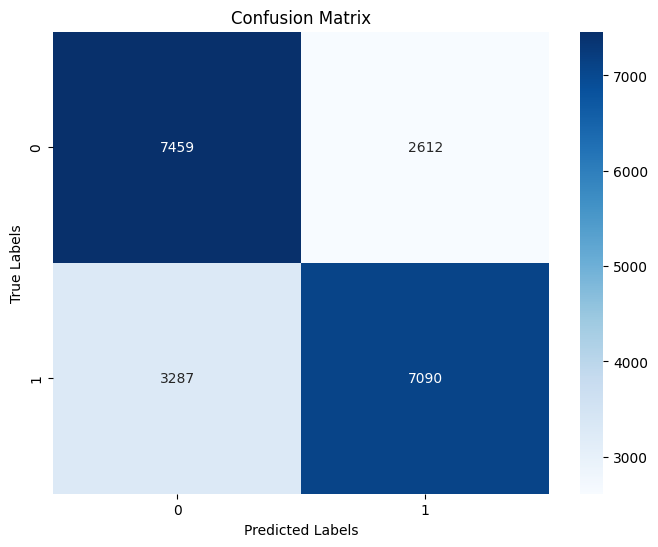

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(ytest, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


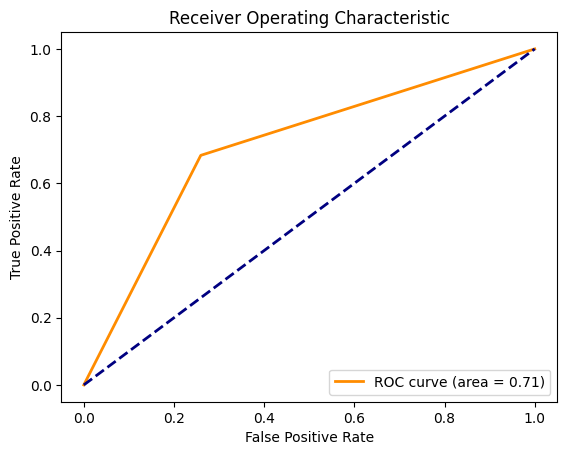

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve, auc
decision_values = lg_model.predict(xtest)
fpr, tpr, _ = roc_curve(ytest, decision_values)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
predict = knn.predict(xtest)

#PRINT REPORT
print(confusion_matrix(ytest,predict))
print(classification_report(ytest,predict))

[[7043 3028]
 [3198 7179]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.69     10071
           1       0.70      0.69      0.70     10377

    accuracy                           0.70     20448
   macro avg       0.70      0.70      0.70     20448
weighted avg       0.70      0.70      0.70     20448



In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    predict_i=knn.predict(xtest)
    error_rate.append(np.mean(predict_i != ytest))

Text(0, 0.5, 'Error Rate')

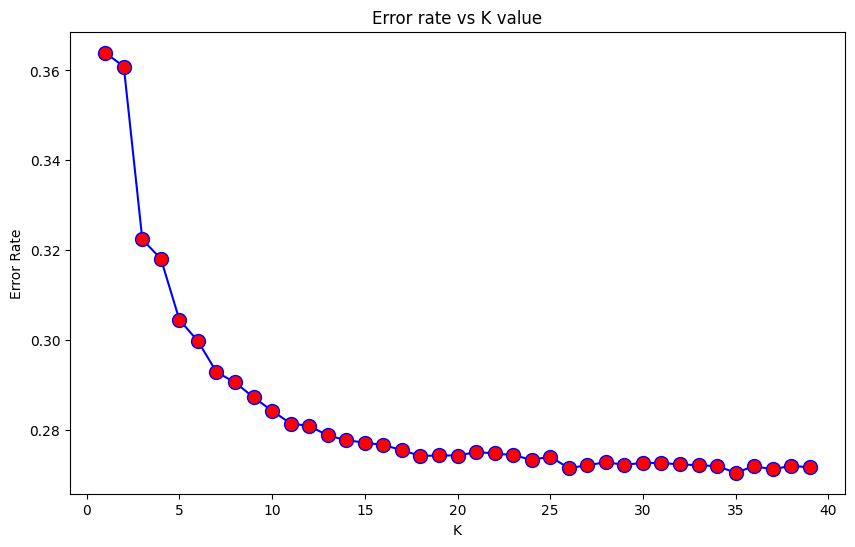

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue' ,marker='o',
         markerfacecolor ='red',markersize=10)
plt.title("Error rate vs K value")
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
# fit our model again with the perfect k value
knn =KNeighborsClassifier(n_neighbors=36)
knn.fit(xtrain,ytrain)
predict2 = knn.predict(xtest)

#print report
print(confusion_matrix(ytest,predict2))
print('\n')
print(classification_report(ytest,predict2))


[[7863 2208]
 [3352 7025]]


              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10071
           1       0.76      0.68      0.72     10377

    accuracy                           0.73     20448
   macro avg       0.73      0.73      0.73     20448
weighted avg       0.73      0.73      0.73     20448



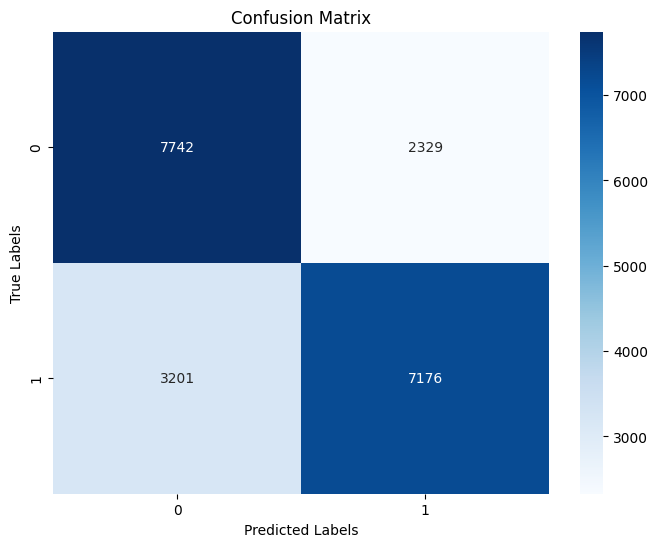

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(ytest, predict2)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

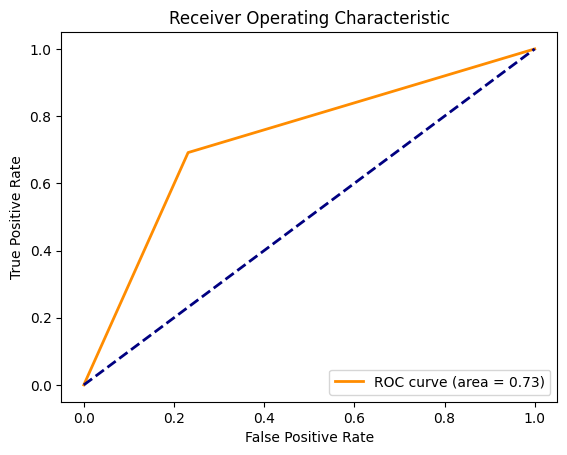

In [ ]:
from sklearn.metrics import roc_curve, auc
decision_values = knn.predict(xtest)
fpr, tpr, _ = roc_curve(ytest, decision_values)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
BNB = BernoulliNB()

In [ ]:
BNB.fit(xtrain,ytrain)

BernoulliNB()

In [ ]:
BNB.score(xtest,ytest)

0.7080888106416275

In [ ]:
pred = BNB.predict(xtest)

In [ ]:
#print report
print(confusion_matrix(ytest,pred))
print('\n')
print(classification_report(ytest,pred))

[[7904 2167]
 [3802 6575]]


              precision    recall  f1-score   support

           0       0.68      0.78      0.73     10071
           1       0.75      0.63      0.69     10377

    accuracy                           0.71     20448
   macro avg       0.71      0.71      0.71     20448
weighted avg       0.71      0.71      0.71     20448



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GNB = GaussianNB()

In [ ]:
GNB.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
GNB.score(xtest,ytest)

0.6496236191221039

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Dtree = DecisionTreeClassifier()

In [ ]:
Dtree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
predictions = Dtree.predict(xtest)

In [ ]:
print(confusion_matrix(ytest,predictions))
print('\n')
print(classification_report(ytest,predictions))

[[6511 3570]
 [3947 6430]]


              precision    recall  f1-score   support

           0       0.62      0.65      0.63     10081
           1       0.64      0.62      0.63     10377

    accuracy                           0.63     20458
   macro avg       0.63      0.63      0.63     20458
weighted avg       0.63      0.63      0.63     20458



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=300)

In [ ]:
rfc.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=300)

In [ ]:
predictions2 = rfc.predict(xtest)

In [ ]:
print(confusion_matrix(ytest,predictions2))
print('\n')
print(classification_report(ytest,predictions2))


[[7116 2965]
 [3098 7279]]


              precision    recall  f1-score   support

           0       0.70      0.71      0.70     10081
           1       0.71      0.70      0.71     10377

    accuracy                           0.70     20458
   macro avg       0.70      0.70      0.70     20458
weighted avg       0.70      0.70      0.70     20458



In [ ]:
from xgboost import XGBClassifier


In [ ]:
# fit model on training data
model = XGBClassifier()
model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# make predictions for test data
y_pred = model.predict(xtest)
predictions3 = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(ytest, predictions3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.73%


In [ ]:
print(confusion_matrix(ytest,predictions3))
print('\n')
print(classification_report(ytest,predictions3))

[[7682 2399]
 [3179 7198]]


              precision    recall  f1-score   support

           0       0.71      0.76      0.73     10081
           1       0.75      0.69      0.72     10377

    accuracy                           0.73     20458
   macro avg       0.73      0.73      0.73     20458
weighted avg       0.73      0.73      0.73     20458



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create a base Decision Tree Classifier (you can customize this classifier)
base_classifier = DecisionTreeClassifier(max_depth=3)

In [ ]:
# Create an AdaBoost Classifier using the base classifier
clf = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

In [ ]:
# Train the classifier on the training data
clf.fit(xtrain, ytrain)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   random_state=42)

In [ ]:
y_pred = clf.predict(xtest)

In [ ]:
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7324921752738655
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10071
           1       0.76      0.70      0.73     10377

    accuracy                           0.73     20448
   macro avg       0.73      0.73      0.73     20448
weighted avg       0.73      0.73      0.73     20448



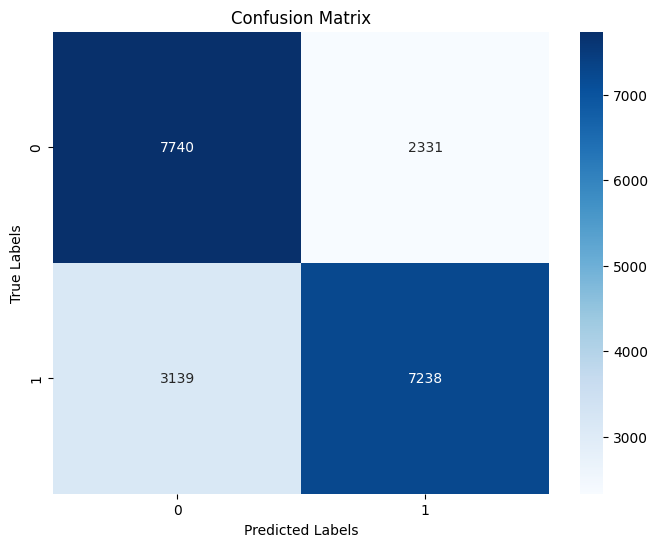

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(ytest, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

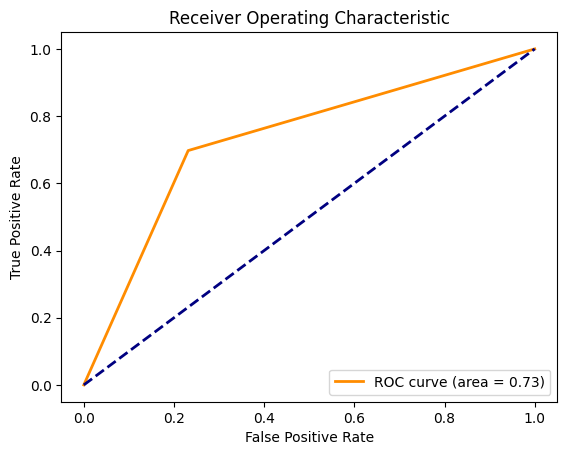

In [ ]:
from sklearn.metrics import roc_curve, auc
decision_values = clf.predict(xtest)
fpr, tpr, _ = roc_curve(ytest, decision_values)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Voting Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

Accuracy:[0.7323296509922769]
ROC AUC:[0.7335575753904141]
Recall:[0.7544916398379894]
Precision:[0.7001060036619446]
F1-Score:[0.7262821153653903]
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10081
           1       0.75      0.70      0.73     10377

    accuracy                           0.73     20458
   macro avg       0.73      0.73      0.73     20458
weighted avg       0.73      0.73      0.73     20458

Confusion_Matrix
----------------------


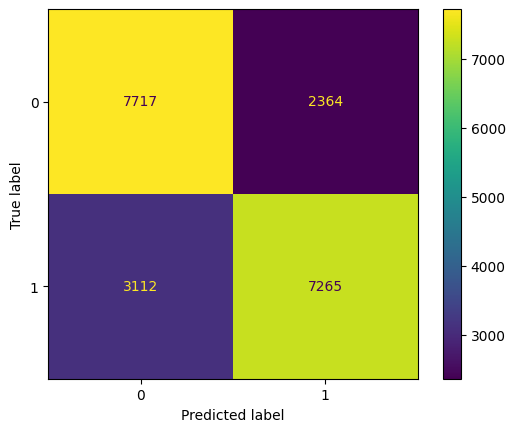

In [ ]:
# Create the list to store the result
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []

# Create a Model
gbc= GradientBoostingClassifier(max_features=11, min_samples_split=5)
gbc1= GradientBoostingClassifier(max_features=11, min_samples_split=5)
rf=RandomForestClassifier(max_features=11, min_samples_leaf=10, n_estimators=300)
lr= LogisticRegression(penalty='l1' , solver='liblinear')


voting_clf= VotingClassifier(estimators=[('gradient_boosting', gbc),('gradient_boosting1', gbc1),('random_forest',rf),('logistic_regression',lr)], voting='soft', n_jobs=-1)
voting_clf.fit(xtrain, ytrain)
y_pred= voting_clf.predict(xtest)
accuracy_scores.append(accuracy_score(y_pred, ytest))
precision_scores.append(precision_score(y_pred, ytest))
recall_scores.append(recall_score(y_pred, ytest))
f1_scores.append(f1_score(y_pred, ytest))
auc_roc_scores.append(roc_auc_score(y_pred, ytest))


# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"ROC AUC:{auc_roc_scores}")
print(f"Recall:{recall_scores}")
print(f"Precision:{precision_scores}")
print(f"F1-Score:{f1_scores}")
print("Classification_Report")
print("-----------------------")
print(classification_report(ytest,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(ytest, y_pred)
plt.show()

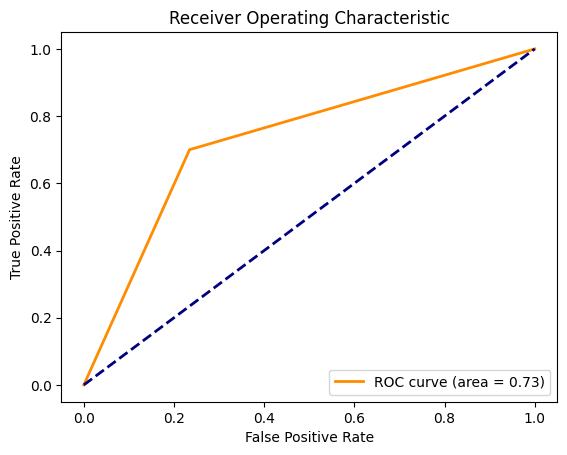

In [ ]:
from sklearn.metrics import roc_curve, auc
decision_values = voting_clf.predict(xtest)
fpr, tpr, _ = roc_curve(ytest, decision_values)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#neural network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential



accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []
# create a model
model=Sequential()
model.add(Dense(10, input_dim=xtrain.shape[1],activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(1, activation="sigmoid"))         # In Output layer sigmoid is used as a activation function
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])


# Callbacks-- Stop training automatically once the model performance stop improving
callback= tf.keras.callbacks.EarlyStopping(monitor="loss", patience=4)

# Fit the model
model.fit(xtrain, ytrain,epochs=500, batch_size=32, callbacks=[callback],verbose=1)

# Predictions
y_pred= model.predict(xtest)
y_preds= tf.round(y_pred)
accuracy_scores.append(accuracy_score(y_preds, ytest))
precision_scores.append(precision_score(y_preds, ytest))
recall_scores.append(recall_score(y_preds, ytest))
f1_scores.append(f1_score(y_preds, ytest))
auc_roc_scores.append(roc_auc_score(y_preds, ytest))

Epoch 1/500
1422/1422 [==============================] - 14s 9ms/step - loss: 0.6683 - accuracy: 0.6249
Epoch 2/500
1422/1422 [==============================] - 9s 6ms/step - loss: 0.5853 - accuracy: 0.7012
Epoch 3/500
1422/1422 [==============================] - 11s 7ms/step - loss: 0.5651 - accuracy: 0.7180
Epoch 4/500
1422/1422 [==============================] - 10s 7ms/step - loss: 0.5598 - accuracy: 0.7218
Epoch 5/500
1422/1422 [==============================] - 10s 7ms/step - loss: 0.5565 - accuracy: 0.7249
Epoch 6/500
1422/1422 [==============================] - 11s 8ms/step - loss: 0.5548 - accuracy: 0.7251
Epoch 7/500
1422/1422 [==============================] - 9s 6ms/step - loss: 0.5534 - accuracy: 0.7261
Epoch 8/500
1422/1422 [==============================] - 11s 8ms/step - loss: 0.5527 - accuracy: 0.7269
Epoch 9/500
1422/1422 [==============================] - 9s 7ms/step - loss: 0.5518 - accuracy: 0.7266
Epoch 10/500
1422/1422 [==============================] - 11s 8ms/s

Accuracy:[0.728272558412357]
ROC AUC:[0.7282176210476812]
Recall:[0.7325738559567484]
Precision:[0.7312325334875205]
F1-Score:[0.7319025801784423]
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       0.72      0.73      0.72     10081
           1       0.73      0.73      0.73     10377

    accuracy                           0.73     20458
   macro avg       0.73      0.73      0.73     20458
weighted avg       0.73      0.73      0.73     20458

Confusion_Matrix
----------------------


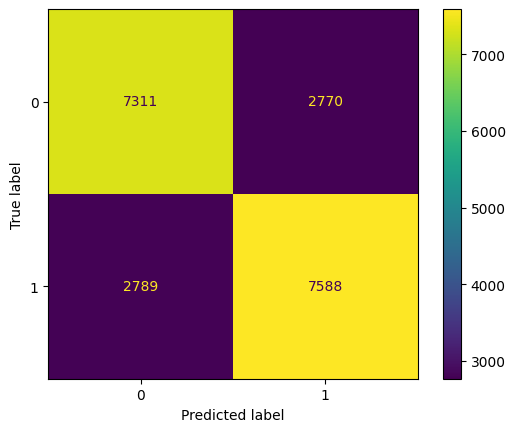

In [ ]:
# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"ROC AUC:{auc_roc_scores}")
print(f"Recall:{recall_scores}")
print(f"Precision:{precision_scores}")
print(f"F1-Score:{f1_scores}")


print("Classification_Report")
print("-----------------------")
print(classification_report(ytest,y_preds))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(ytest, y_preds)
plt.show()

640/640 [==============================] - 3s 4ms/step
ROC AUC: 0.7982521827605187


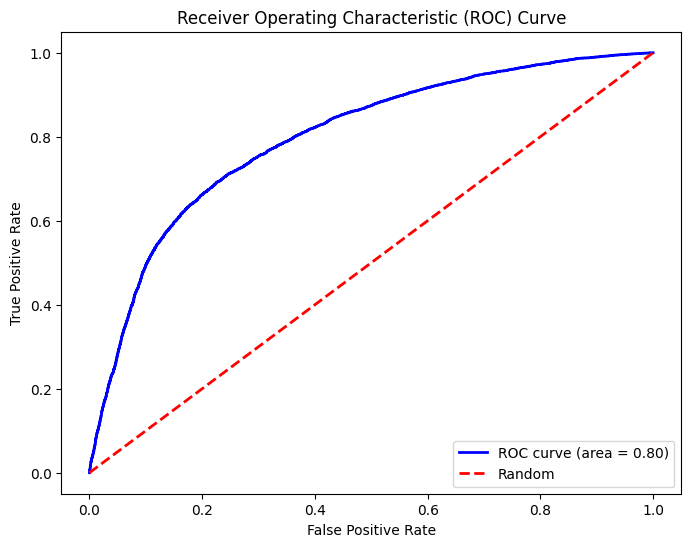

In [ ]:
# Predictions
y_pred = model.predict(xtest)
y_preds = tf.round(y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(ytest, y_pred)
print(f"ROC AUC: {roc_auc}")

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Assuming X_train, y_train, X_test, and y_test are already defined

# Random Forest Classifier with default parameters
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV with 5-fold cross-validation and accuracy scoring
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Fit the best model on the training data
best_rf.fit(xtrain, ytrain)

# Predictions on the training set
y_pred_train = best_rf.predict(xtrain)

# Calculate performance metrics on the training set
accuracy_train = accuracy_score(ytrain, y_pred_train)
f1_train = f1_score(ytrain, y_pred_train, average='weighted')
prec_train = precision_score(ytrain, y_pred_train, average='weighted')
rec_train = recall_score(ytrain, y_pred_train, average='weighted')

print('Tuned Random Forest Model Performance on Training Set')
print('- Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('- F1 score: {:.2f}'.format(f1_train))
print('- Precision: {:.2f}'.format(prec_train))
print('- Recall: {:.2f}'.format(rec_train))

# Assuming 'results' DataFrame is defined elsewhere
model_results = pd.DataFrame([['TunedRF', accuracy_train, f1_train, prec_train, rec_train]],
                             columns=['Model', 'Training Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Add the results to the existing DataFrame or create a new one as needed
# results = results.append(model_results, ignore_index=True)

print("Best Hyperparameters:", best_params)


Tuned Random Forest Model Performance on Training Set
- Accuracy: 75.11%
- F1 score: 0.75
- Precision: 0.75
- Recall: 0.75
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


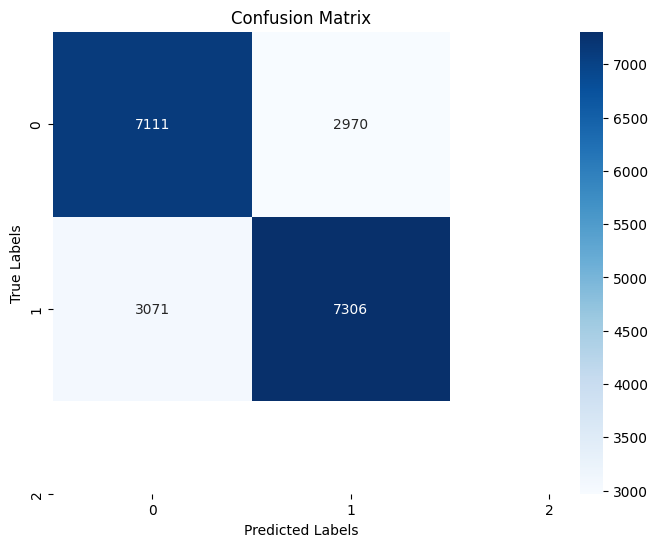

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(ytest, y_test_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Assuming X_train, y_train, X_test, and y_test are already defined

# XGBoost Classifier with default parameters
xgb = XGBClassifier(random_state=42)

# Hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 2, 3]
}

# GridSearchCV with 5-fold cross-validation and accuracy scoring
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

# Fit the best model on the training data
best_xgb.fit(xtrain, ytrain)

# Predictions on the training set
y_pred_train = best_xgb.predict(xtrain)

# Calculate performance metrics on the training set
accuracy_train = accuracy_score(ytrain, y_pred_train)
f1_train = f1_score(ytrain, y_pred_train, average='weighted')
prec_train = precision_score(ytrain, y_pred_train, average='weighted')
rec_train = recall_score(ytrain, y_pred_train, average='weighted')

print('Tuned XGBoost Model Performance on Training Set')
print('- Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('- F1 score: {:.2f}'.format(f1_train))
print('- Precision: {:.2f}'.format(prec_train))
print('- Recall: {:.2f}'.format(rec_train))

# Assuming 'results' DataFrame is defined elsewhere
model_results = pd.DataFrame([['TunedXGB', accuracy_train, f1_train, prec_train, rec_train]],
                             columns=['Model', 'Training Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Add the results to the existing DataFrame or create a new one as needed
# results = results.append(model_results, ignore_index=True)

print("Best Hyperparameters:", best_params)


Tuned XGBoost Model Performance on Training Set
- Accuracy: 74.15%
- F1 score: 0.74
- Precision: 0.74
- Recall: 0.74
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1.0}


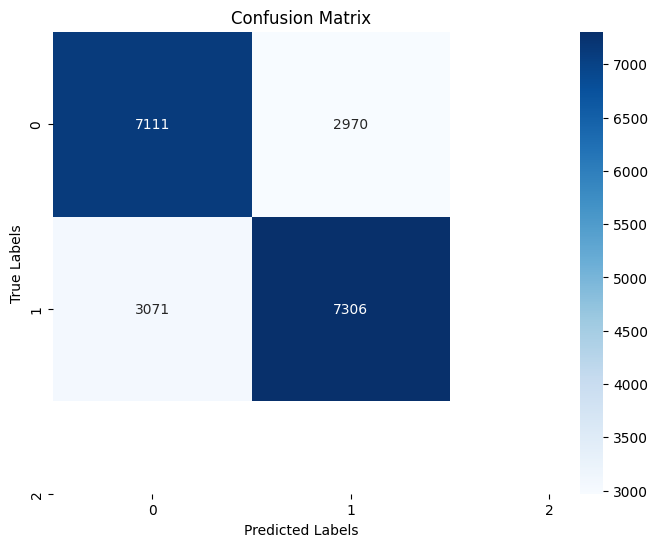

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(ytest, y_test_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
X_scaled = sc.fit_transform(x)


pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)